In [1]:
## Import Dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
import requests
from pprint import pprint
from datetime import datetime, timedelta
import numpy as np

import yfinance as yf
## https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy#holdings

sp500_df = pd.read_csv('s&p500.csv')

In [2]:
## 1.Calculate the yearly return and create a DF 

In [3]:
## read the price 500 stocks price data
sp500price_df = pd.read_csv('../output_data/stock500.csv')
sp500price_df = sp500price_df .dropna()
del sp500price_df["Unnamed: 0"]

In [4]:
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499
...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999


In [5]:
unique = sp500price_df['Symbol'].unique()
len(unique)

500

In [6]:
# Calculate the yearly return for each stock, which is the percentage change in price from the beginning of the year to the end of the year.
sp500price_df['Yearly Return (%)'] = (sp500price_df['Close']-sp500price_df['Open'])/sp500price_df['Open']*100
sp500price_df['Yearly Moving (%)'] = (sp500price_df['Highest']-sp500price_df['Lowest'])/sp500price_df['Lowest']*100
sp500price_df

,Symbol,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%)
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196
...,...,...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119


In [7]:
# merge the price file and stock information file
renamed_df = sp500price_df.rename(columns={"Symbol":"Ticker"})
merge_df = pd.merge(renamed_df, sp500_df, on="Ticker")
merge_df.head(25)

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
5,AAPL,2018,58.367500,36.647499,42.540001,39.435001,-7.299011,59.267349,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
6,AAPL,2019,73.492500,35.500000,38.722500,73.412498,89.586155,107.021128,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
7,AAPL,2020,138.789993,53.152500,74.059998,132.690002,79.165551,161.116585,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
8,AAPL,2021,182.130005,116.209999,133.520004,177.570007,32.991313,56.724900,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
9,AAPL,2022,182.940002,125.870003,177.830002,129.929993,-26.935842,45.340429,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD


In [8]:
# Export the Data into a csv
merge_df.to_csv("../output_data/merge.csv")

In [9]:
 ## 2. Calculate the weighted yearly return moving and create a DF 

## Plot Sectors Yearly moving and changing

In [10]:
#read the 500 stocks data
merge_df = pd.read_csv('../output_data/merge.csv')
del merge_df["Unnamed: 0"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD


In [11]:
# Calculated the Weighted Yearly Return and Moving
merge_df["Weighted Yearly Return"] = merge_df["Yearly Return (%)"]*merge_df["Weight"]
merge_df["Weighted Yearly Moving"] = merge_df["Yearly Moving (%)"]*merge_df["Weight"]
merge_df

,Ticker,Year,Highest,Lowest,Open,Close,Yearly Return (%),Yearly Moving (%),Name,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency,Weighted Yearly Return,Weighted Yearly Moving
0,AAPL,2013,20.540714,13.753571,19.779285,20.036428,1.300062,49.348231,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,9.243800,350.879490
1,AAPL,2014,29.937500,17.626785,19.845715,27.594999,39.047648,69.840952,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,277.639515,496.588378
2,AAPL,2015,33.634998,23.000000,27.847500,26.315001,-5.503185,46.239123,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,-39.129156,328.772881
3,AAPL,2016,29.672501,22.367500,25.652500,28.955000,12.873988,32.658993,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,91.537594,232.214420
4,AAPL,2017,44.299999,28.690001,28.950001,42.307499,46.139889,54.409196,Apple Inc.,3783310,2046251,7.110275,Information Technology,163874670.0,USD,328.067298,386.864348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,DISH,2018,50.490002,23.219999,48.410000,24.969999,-48.419749,117.441874,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.257545,0.624673
4879,DISH,2019,44.660000,24.250000,24.350000,35.470001,45.667354,84.164948,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.242905,0.447673
4880,DISH,2020,42.619999,17.090000,35.869999,32.340000,-9.841090,149.385597,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,-0.052345,0.794582
4881,DISH,2021,47.049999,28.530001,32.430000,32.439999,0.030830,64.914119,DISH Network Corporation Class A,25470M10,2303581,0.005319,Communication Services,2706237.0,USD,0.000164,0.345278


In [12]:
# Calculate the weight yearly return for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_return_sector = grouped["Weighted Yearly Return"].mean()
df = pd.DataFrame(weighted_return_sector)
df = df.reset_index().rename(columns={'index': 'Sector'})
df

,Sector,Year,Weighted Yearly Return
0,Communication Services,2013,25.335798
1,Communication Services,2014,2.902466
2,Communication Services,2015,13.241167
3,Communication Services,2016,4.091127
4,Communication Services,2017,10.875608
...,...,...,...
105,Utilities,2018,0.163513
106,Utilities,2019,2.426936
107,Utilities,2020,-0.075121
108,Utilities,2021,1.355889


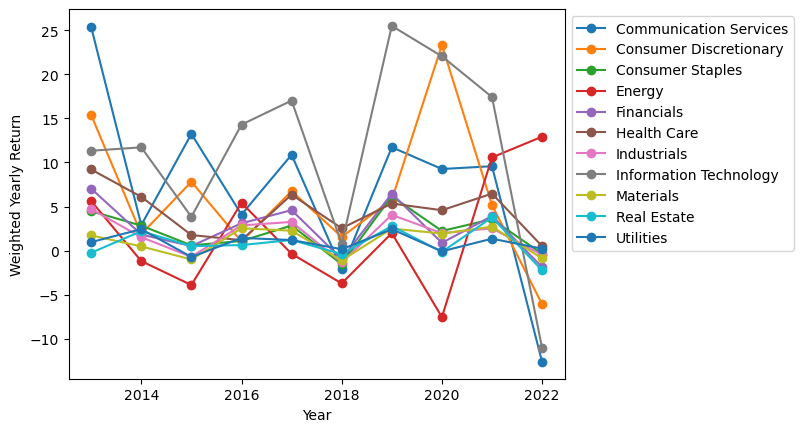

In [13]:
fig, ax = plt.subplots()

for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Return'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Return')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


In [14]:
# Calculate the weight yearly moving for each sector
grouped = merge_df.groupby(["Sector","Year"])
weighted_moving_sector = grouped["Weighted Yearly Moving"].mean()
df = pd.DataFrame(weighted_moving_sector)
df = df.reset_index().rename(columns={'index': 'Sector'})
df

,Sector,Year,Weighted Yearly Moving
0,Communication Services,2013,32.508770
1,Communication Services,2014,13.163667
2,Communication Services,2015,22.023521
3,Communication Services,2016,13.394258
4,Communication Services,2017,15.596372
...,...,...,...
105,Utilities,2018,3.324006
106,Utilities,2019,5.103118
107,Utilities,2020,8.018645
108,Utilities,2021,3.048522


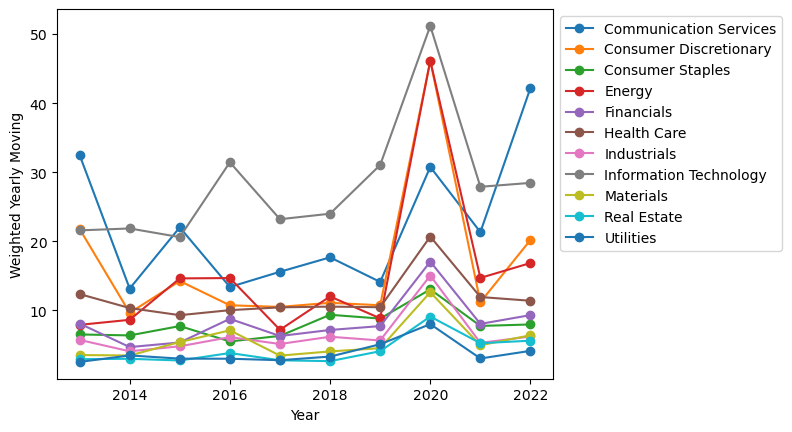

In [15]:
# Plot the moving data
fig, ax = plt.subplots()

for sector in df['Sector'].unique():
    subset = df[df['Sector'] == sector]
    ax.plot(subset['Year'], subset['Weighted Yearly Moving'], marker='o', linestyle='-', label=sector)

ax.set_xlabel('Year')
ax.set_ylabel('Weighted Yearly Moving')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()